In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [78]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [79]:
df = pd.DataFrame(california.data, columns=california.feature_names)

In [80]:
df['Price'] = california.target

In [81]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [82]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['Price']

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler();
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [85]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression();
regression.fit(X_train,y_train)

LinearRegression()

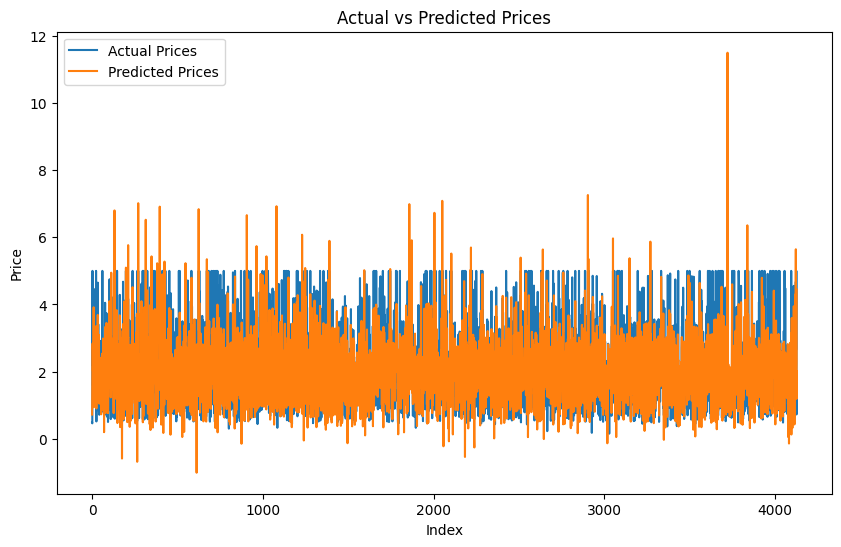

In [86]:
y_pred = regression.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print('R^2 :',r2_score(y_test,y_pred))


Mean Squared Error : 0.5558915986952444
Mean Absolute Error : 0.5332001304956564
R^2 : 0.5757877060324508


C:\Users\jasje\AppData\Local\Temp\ipykernel_42312\4283780428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred,kde=True)


<Axes: xlabel='Price', ylabel='Density'>

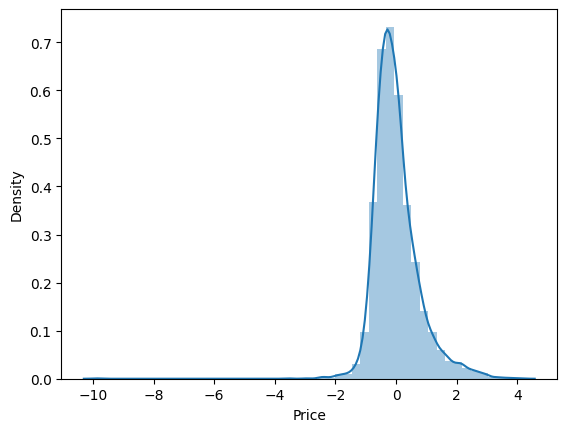

In [88]:
sns.distplot(y_test-y_pred,kde=True)

In [89]:
import pickle

In [90]:
pickle.dump(regression, open('california_housing_model.pkl','wb'))

In [91]:
model = pickle.load(open('california_housing_model.pkl','rb'))

In [ ]:
model 

LinearRegression()